In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head(n=6) #to see how the data looks
#train_data.tail()
#train_data.dtypes

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [3]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
from sklearn.model_selection import train_test_split

X1 = train_data[['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']]
Y1 = train_data['Survived']

X_train, X_val, y_train, y_val = train_test_split(X1, Y1, test_size=0.2)

In [5]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
#y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked"]
X = pd.get_dummies(X_train[features])
#X.head()
X_test = pd.get_dummies(X_val[features])

model = RandomForestClassifier(n_estimators=100, random_state=1, oob_score=True)
pred = model.fit(X, y_train).predict(X_test)
#predictions = model.predict(X_test)
#predictions.dtype
#print (pred)

from sklearn.metrics import accuracy_score
print("Random-Forest accuracy : ",accuracy_score(y_val, pred, normalize = True))
print(model.score(X,y_train))



Random-Forest accuracy :  0.770949720670391
0.8398876404494382


In [6]:
model_new = AdaBoostClassifier(n_estimators=100)
pred_new = model_new.fit(X,y_train).predict(X_test)
print("Adaboost accuracy : ",accuracy_score(y_val, pred_new, normalize = True))

                                        

Adaboost accuracy :  0.8100558659217877


In [7]:
from sklearn.svm import SVC

svc = SVC()
pred_new2 = svc.fit(X, y_train).predict(X_test)
print("SVM accuracy : ",accuracy_score(y_val, pred_new2, normalize = True))

SVM accuracy :  0.8100558659217877


/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


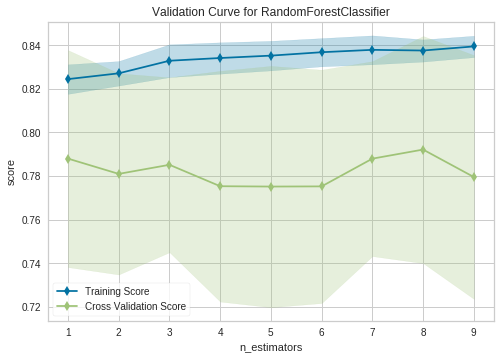

In [8]:
#from yellowbrick.datasets import load_energy
from yellowbrick.model_selection import ValidationCurve

# Load a regression dataset
#X, y = load_energy()
#r2 = accuracy_score(y_val, pred, normalize = True)
viz = ValidationCurve(
    RandomForestClassifier(), param_name="n_estimators",
    param_range=np.arange(1, 10), cv=10
)

# Fit and show the visualizer
viz.fit(X, y_train)
viz.show()

In [9]:
y = train_data["Survived"]
X2 = pd.get_dummies(train_data[features])
X2_test = pd.get_dummies(test_data[features])
pred_f = svc.fit(X2, Y1).predict(X2_test)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': pred_f})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
